In [2]:
%pip install yfinance pandas numpy matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
symbols = ['IBM','MSFT','AAPL','META', 'AU','AEM','GFI']
data = yf.download(symbols, start="2020-01-01", end="2022-11-30")
portfolio_returns = data['Adj Close'].pct_change().dropna()

[*********************100%***********************]  7 of 7 completed


In [8]:
pca = PCA(n_components=3)
pca.fit(portfolio_returns)

PCA(n_components=3)

In [10]:
pct = pca.explained_variance_ratio_
pca_components = pca.components_

(0.0, 100.0)

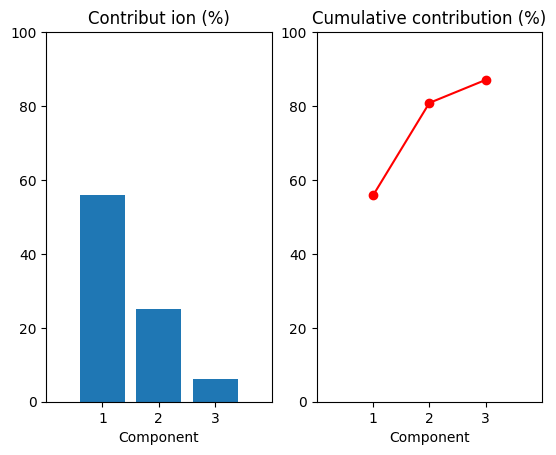

In [15]:
cum_pct = np.cumsum(pct)
x = np.arange(1,len(pct)+1,1)
plt.subplot(1,2,1)
plt.bar(x,pct*100,align="center")
plt.title('Contribut ion (%)')
plt.xlabel('Component')
plt.xlim([0,4])
plt.xticks(x)
plt.ylim([0,100])
plt.subplot(1,2,2)
plt.plot (x,cum_pct* 100,'ro-')
plt.title('Cumulative contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

In [18]:
X = np.array(portfolio_returns)

factor_returns = X.dot(pca_components.T)

factor_returns = pd.DataFrame(columns=["f1","f2","f3"],index=portfolio_returns.index,data=factor_returns)

factor_returns.head()

,f1,f2,f3
Date,,,
2020-01-03,0.009409,0.014171,-0.006648
2020-01-06,-0.008033,-0.016187,-0.010314
2020-01-07,0.006056,0.003165,-0.002987
2020-01-08,0.067285,-0.040283,0.008385
2020-01-09,0.007400,-0.031599,0.008489


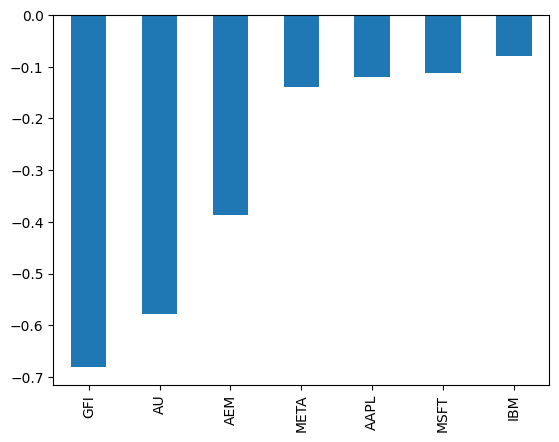

In [22]:
import matplotlib.pyplot as plt

factor_exposures = pd.DataFrame(columns=["f1","f2","f3"],index=portfolio_returns.columns,data=pca_components.T)
factor_exposures.f1.sort_values().plot.bar()
plt.show()